# Business understanding

+ This data set was extracted form the 1994 Census bureu database and placed in Kaggle website. We will use this data to understand the factors that contribute to a person making more or less than 50K anually. 

+ The outcome is to find factors related to income. Some of the specific relations we want to look at are checking if there is a statistical significance between sex vs income and race vs income. We will perform chi sqr test and use it's p value to assess and confirm the result. Another aspect we want to look at is that given how gender, race and age are factors that a person can't change, we want to see what specific education and other factors, with that specific race or age or sex, could help a person have higher chance of getting more than 50k anually. To validate that we would do a two way anova and check if it is statistically significant.

+ We also performed PCA to find which specific factors contributes most to the differences observed in the data.

+ Given the results of these hypothesis this would could help either find societal gaps that the government needs to address and give an idea on what factors can help a person obtain more thatn 50K given race, gender or even age.



In [103]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:
#finding in current path
os.path.dirname(os.path.realpath('__file__'))

'/Users/lauraahumada/Desktop/Machine Learning/DataMiningNotebooks'

In [105]:
#Opening file
df=pd.read_csv("adult.csv")

# Data understanding

## Data types
+ The size of the data is 30,718 entries and 14 attributes/columns


| Attribute | Description | Type | Values | 
| --- | --- | --- | --- |
| age | The age of this person. | *Continuos, Ratio* | `17 - 90` 
| workclass | The employment status of this person. | *Discret, Nominal* | `Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked`
| fnlwgt | The final weight of how many people this person represents. | *Continuous, Ratio* | `12,285 - 1,484,705` 
| education | The highest level of education this person has achieved. | *Discrete, Ordinal* | `Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool` 
| education.num | Numerical form of the highest level of education this person achieved. | *Discrete, Ordinal* | `1 - 16` 
| marital.status | The marital status of this person. `Married-civ-spouse` corresponds to civilian spouse. `Married-AF-spouse` corresponds to an Armed Forces spouse. | *Discrete, Nominal* | `Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse` 
| occupation | The general type of occupation of this person. | *Discrete, Nominal* | `Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces` 
| relationship | The relation that this person identifies as in their immediate family. | *Discrete, Nominal* | `Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried` 
| race | The race of this person. | *Discrete, Nominal* | `White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black` 
| sex | The biological sex of this person. | *Discrete, Nominal* | `Female, Male` 
| capital.gain | Capital gains of this person. | *Continuous, Ratio* | `0 - 99,999` 
| capital.loss | Capital loss of this person. | *Continuous, Ratio* | `0 - 4,356` 
| hours.per.week | The number of hours this person reports to work per week.| *Continuous, Ratio* | `1 - 99` 
| native.country | The country of origin of this person. | *Discrete, Nominal* | `United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands` 
| income | The logistic classification of this person based on their income. | *Discrete, Ordinal* | `<=50k, >50k` 


In [106]:
df.shape

(32561, 15)

In [107]:
#Looking at the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.

***Duplicates***
+ We do find that there are 24 duplicate records but it makes sense how there could be people with same entries, given the categories and the fact that it is a census with over 30,000 entries. Therefore, we will keep duplicate entries.

***Missing Values***
+ We do see missing values in workclass, occupation and native.country entered as "?" and "".

+ Despite the "?" values taking around 5% of their respective columns "workclass", "occupation", "native.country", they were not removed due to the following reason. Census data is collected by census-takers knocking on doors and will either ask or let citizens volunteeringly write down the answer of questions about their workclass, occupation and native country, and the people may not want to report those 3 things to the government. However their incomes were still reported so it's best to treat those missing values as another category and replace them with "Unknown".

	|Column	|MissingValues|
   | --- | --- | 
	|workclass	|1836|
	|occupation	|1843|
	|native.country|	583|
    
***Outliers***   
+ All of the values that would be considered as outliers are plausible and does not look like misreported data. Therefore, we will not remove any.

+ The outliers does not mean people outperforming in a certain category or attribute to a point where a predicting algorithm is misrepresenting the original data, but rather outperforming attributes (like income itself) is natural in datasets like this one.

In [109]:
#description
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [110]:
#duplicates
df[df.duplicated()].count()

age               24
workclass         24
fnlwgt            24
education         24
education.num     24
marital.status    24
occupation        24
relationship      24
race              24
sex               24
capital.gain      24
capital.loss      24
hours.per.week    24
native.country    24
income            24
dtype: int64

+ Checking Capital gain and loss, we can see median is 0 and mean is 1077 showing just outliers. We will treat this ahead

+ It was interesting to see how people that are states Married CIV Spouse have relationship as "Not in Family" that could mean they are seperated. 
+ It was interesting also to see how "Unmarried" and "Not in Family" share the same Marital status.

In [111]:
# unmarried is widowed, divorsed, separated, never-married, married spouse absent
df[df["relationship"]=="Unmarried"]["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-spouse-absent'], dtype=object)

In [112]:
df[df["relationship"]=="Not-in-family"]["marital.status"].unique()

array(['Widowed', 'Divorced', 'Never-married', 'Separated',
       'Married-civ-spouse', 'Married-spouse-absent'], dtype=object)

In [113]:
df[(df["relationship"]=="Not-in-family") & (df["marital.status"]=="Married-civ-spouse")].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
26,33,Private,228696,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,Mexico,<=50K
3739,18,Private,184016,HS-grad,9,Married-civ-spouse,Priv-house-serv,Not-in-family,White,Female,3103,0,40,United-States,<=50K
3802,56,State-gov,54260,Doctorate,16,Married-civ-spouse,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,2885,0,40,China,<=50K
5246,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
6393,31,Private,133770,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Not-in-family,Asian-Pac-Islander,Male,0,0,50,United-States,>50K


In [114]:
# counting how many missing/incorrect values.
# we know they have less than 2 characters ? and empty
# creating list for incorrect values
counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]


{'[]', "['?']"}


,Column,MissingValues
0,workclass,1836
3,occupation,1843
7,native.country,583


In [115]:
# missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

+ It seems like there are no missing values per code however we did see question marks in the categorical variables whe checking unique variables so we will address those

+ Replacing question mark as the unknown category

In [116]:
# replacing question mark
df[['workclass','occupation','native.country']] = df[['workclass','occupation','native.country']].replace({'?':'Unknown'})


 ##  New Variables / Features

Based on the factors we have, we saw that we could segmnent age and hours worked into categories that we can use to visualize and further analyze. We also see that capital gain and capital loss have the same distribution and can be combined into a single variable as net_capital.

+ Classifying age set as "age_class"  \
    containing "Young"(0,25), "Middle-aged(26,45)", "Senior"(46-65), "Old"(66+)
+ Classifying hours worked set as "work_type" \
    containing "PartTime"(0,25), "Full_time"(25,40), "OverTime"(41-60), "Workaholic"(60+)
+ Creating net_capital as variable, subtracting the capital gain and capital loss data\
    mean is 990, min is -4356, max is 99,999 and median is still 0


+ We can also see how Education number is misleading and has to many categories. We also assume that those with some highschool are not working.

+ Creating a new variable "educationGroup" with : \
    '1SomeHS', '2HSGrad', '3SomeCol', '4Assoc', '5Bach', '6Mast', '7Proff', '8Doct'

+ example 9 years is  Highschool Grad, so we will assume the categories ("education") are correct and number ("education.num")is incorrect


In [117]:
# New variables this will also help us with graphs
df["age_class"] =pd.cut(df["age"], bins=[15, 25, 45, 65, 100],labels = ["Young", "Middle-aged", "Senior", "Old"])
df["work_type"] =pd.cut(df["hours.per.week"], bins=[0,25,40,60,168],labels = ["PartTime", "Full_time", "OverTime", "Workaholic"])


# Capital gain seems to have all 0 and one hug outlier 99999
df["net_capital"]=df["capital.gain"]-df["capital.loss"]

# making closer groups of education
df['educationGroup'] = pd.cut(df["education.num"], bins = [0, 8, 9, 10, 12, 13, 14, 15, 99], labels = ['1SomeHS', '2HSGrad', '3SomeCol', '4Assoc', '5Bach', '6Mast', '7Proff', '8Doct'], include_lowest=True)


In [118]:
# making sure the new attributes are objectes to match the rest
# later we will modify to category
for i in df.select_dtypes(include=['category']).columns:
    df[i]= df[i].astype("object")
    

In [119]:
# now we can remove eduaction and educaiton.num having the new "educationGroup"
#df=df.drop(columns=["education"])
#drop variables now that information is saved in net_capital
df=df.drop(columns=["capital.loss","capital.gain"])


## Statistics

+ Our summary statistics for continuous variables are described below
+ This points out again how Net capital median 0 while the mean is 990 which shows how skewed this variable. 
+ We can see that age has a more normal distribution, with a mean of 38 year old.
+ Hours per week also has a normal distribution with mean of 40 hours and median of 40 hours.
+ For education.num we can see that it is also normal distribution with a mean of 10 and median of 10.
+ the fnlwgt also seems to have somewhat normal distribution with a mean and median around 180,000	

***Significance***
+ These statistics are important because they tell us about the distribution of the data. It can help us point out outliers, incorrect data, and the range of the continuous variables. This could also help us check assumption of normality for any downstream analysis 



***Below is a table with the extracted facts of interest***

| Continuous Variable | Range | Mean | Median | Mode | Variance |
| --- | --- | --- | --- | --- | --- |
| age | (17,90) | 38.581647 | 37 | 36 | 186.061
| fnlwgt | (1228.5,1484705) | 189778 | 178356 | 164190 & 203488 | 1.114E10
| education.num | (1,16) | 10.081 | 10 | 9 | 6.619
| capital.gain | (0,99999) | 1077.649 | 0 | 0 | 5.454E7
| capital.loss | (0,4356) | 87.304 | 0 | 0 | 1.624E5
| hours.per.week | (1,99) | 40.437 | 40 | 40 | 152.459

In [120]:
df.describe()

,age,fnlwgt,education.num,hours.per.week,net_capital
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456,990.345014
std,13.640433,1.055500e+05,2.572720,12.347429,7408.986951
min,17.000000,1.228500e+04,1.000000,1.000000,-4356.000000
25%,28.000000,1.178270e+05,9.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,99999.000000


##### Distribution
+ Age is a little right skewed 
+ Hours per week seem somewhat normally distributed
+ Net capital it is very right skewed most point around0

age


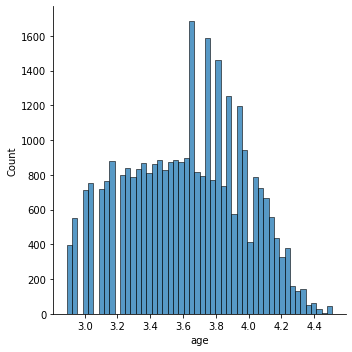

fnlwgt


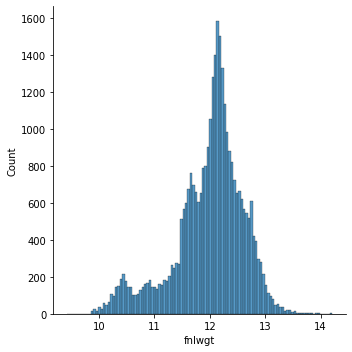

education.num


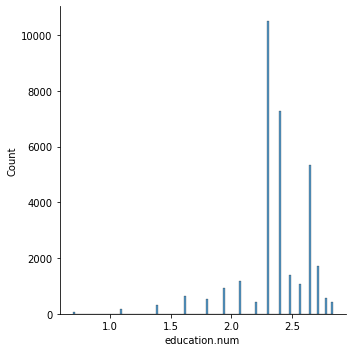

hours.per.week


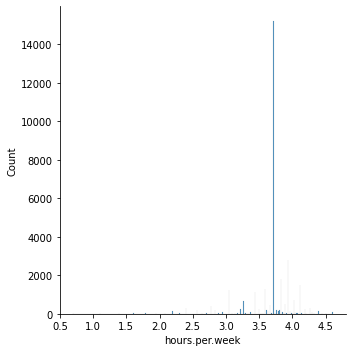

net_capital


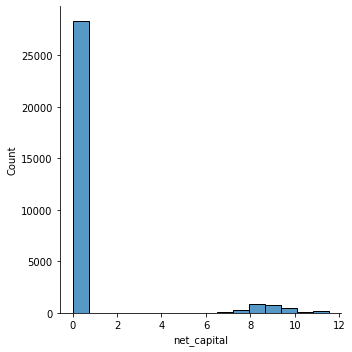

In [143]:
# for future plots
# Creating df of only Categorical variables 
cat_df=df.select_dtypes(include=['object'])

# Creating df of only Continuous variables
num_df = df._get_numeric_data()

for i in list(num_df):
    print(i)
    sns.displot(df[i], kde=False)
    plt.show()

## Distribution of categorical data


Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.

Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).

The distribution of each of the factors seems to make sense. Below are some of the things we noticed:
+ Most people work in private companies
+ Most are married-civ-spouse followed by never married
+ Large majority are white
+ There are 6 times more husbands than wife and Husbands is the largest group
+ This can be explained by having females total being half of the total of males
+ The majority people are from US
+ Most people obtain less than 50K. 76% of the individuals make less than 50K and only 24% make greated than 50K
+ Most people are middle aged
+ Most are are full time
+ More than half have at least graduated highschoool or higher education

In [122]:
print('Under 50K : ' + f"{round(len(df[df.income=='<=50K'])/len(df)*100.0)}", "%")
print('Over 50K : ' + f"{round(len(df[df.income=='>50K'])/len(df)*100.0)}","%")

Under 50K : 76 %
Over 50K : 24 %


[Text(0.5, 1.0, 'Income Distribution')]

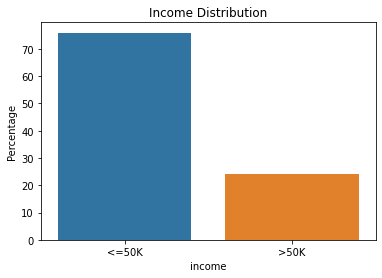

In [123]:
income_perc = df['income'].value_counts(normalize = True).mul(100).round(1).rename_axis('income').reset_index(name = 'Percentage')
sns.barplot(x = 'income', y = 'Percentage', data = income_perc).set(title='Income Distribution')


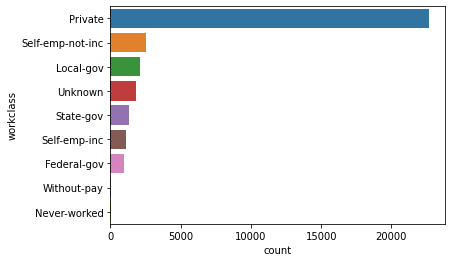

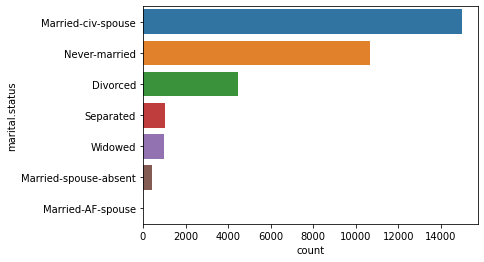

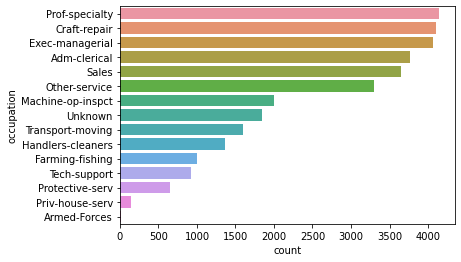

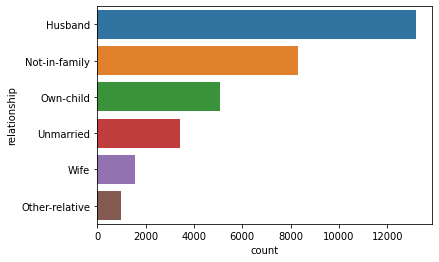

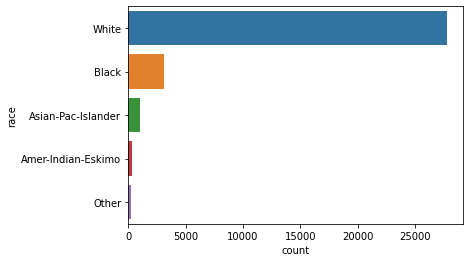

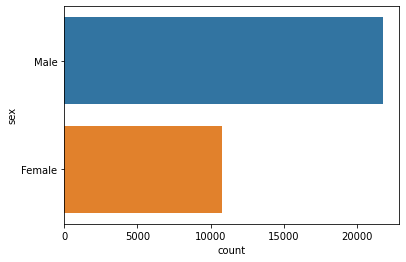

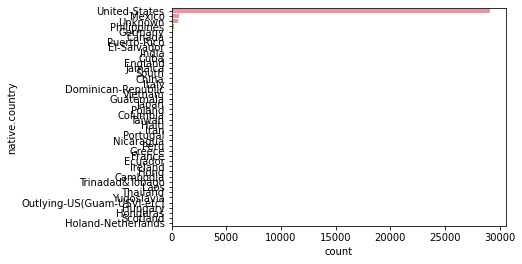

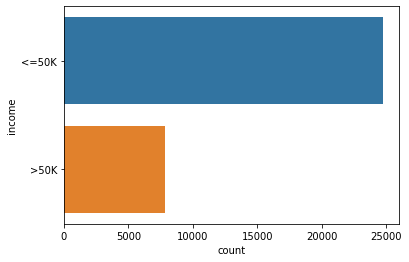

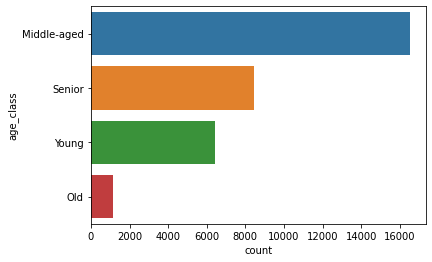

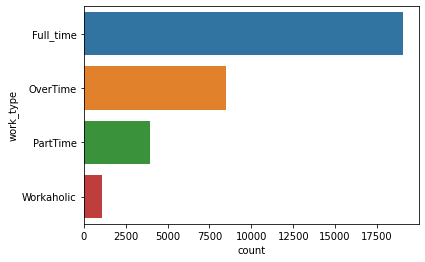

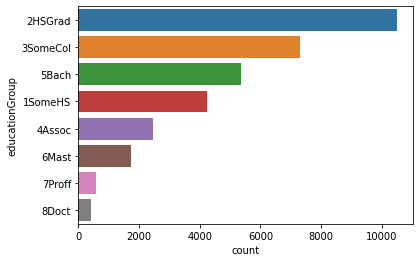

<Figure size 432x288 with 0 Axes>

In [124]:
# Checking the distribution for each factor
for i in cat_df.columns:
    sns.countplot( y= i, data = df, orient= 'h',
    order=df[i].value_counts().index)
    plt.figure()


# Exploring relationships
explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.

Visualize the most important attributes appropriately (at least 5 attributes).
Important: Provide an interpretation for each chart. Explain for each attribute why the
chosen visualization is appropriate.

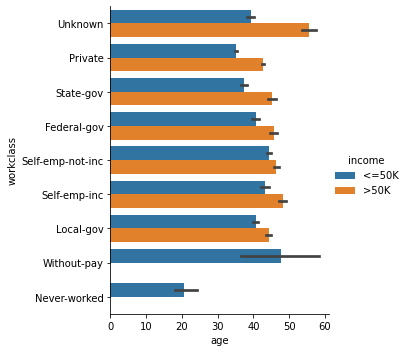

In [125]:
sns.catplot(x="age", y="workclass", hue="income", kind="bar", data=df)

[Text(0.5, 1.0, 'Income distribution by gender')]

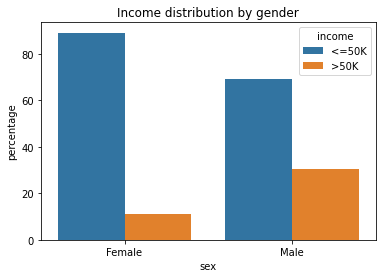

In [126]:
x, y, hue = "sex", "percentage", "income"
(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue).set(title='Income distribution by gender'))

 ***We see that there is a large gap between male and female data therefore we will look at the distribution filtering for each to see if anything is different***

##### Income as the target
+ Marital.status does seem to have a difference on Female and male having >50k.
+ For both male and female Married-AF-Spouse and Married-civ-spouse have the very similar percent for obtaining more or less than 50k
+ Whowever in the rest, there is large gap having females with the lowest percentage of 50K>.

In [127]:
a=pd.crosstab([df["marital.status"],df["sex"]],df["income"],
           normalize='index')

sorted_df = pd.DataFrame(a.sort_values(by = ['>50K'], ascending = [False]))
sorted_df

income                           <=50K      >50K
marital.status        sex                       
Married-civ-spouse    Female  0.544961  0.455039
                      Male    0.554171  0.445829
Married-AF-spouse     Male    0.555556  0.444444
                      Female  0.571429  0.428571
Widowed               Male    0.767857  0.232143
Divorced              Male    0.839639  0.160361
Separated             Male    0.875635  0.124365
Married-spouse-absent Male    0.892019  0.107981
Divorced              Female  0.933009  0.066991
Widowed               Female  0.944242  0.055758
Never-married         Male    0.945064  0.054936
Married-spouse-absent Female  0.946341  0.053659
Never-married         Female  0.965177  0.034823
Separated             Female  0.973059  0.026941


### Just male distribution of all variables and just female distribution of all variables to see diferences

#### Similar
+ For working 78% females works on private companies while 71% of man work on private
+ ***For excecutivte managerial 11% for female while 13% for men.***
+ Sales is another occupation that is similar 11% male while 12% female
+ From all females 89% are from US and from all males 89% are males
+ Out of females 54% are middle age  and for males the same
+ For highschoool grad in their category they make up about the same 32% vs 31%
+ males and females do have about the same % of bacherlos 17% male and 15% woman
+ out of females 5% have Masters and its the same for males
+ ***Education seems similar when taking into account the discrepancy of male and female distribution in the data***
 
#### Big differences
+ 61% males are married with spouse while only 15% females are married
+ More women have never been married 44% vs only 26% of man have never been married
+ Only 8% men are divorsed while 25% women are divorsed
+ 20% of females own child while male own only 12% child even though they have higher% of marriage
+ 88% of males are white and 80% of women are white
+ Out of males 31% make >50k while for out of females only 11% make >55k 
+ out of females 65% are fulltime compare to out of male 55% are full time, however out of males 32% do over time while out of women they only do 15%


***Only Marital.status, relationship and education results are different when filtering by gender***

In [128]:
for i in cat_df.columns:
    print(i.upper())
    print("--------MALE--------")
    print(df[df["sex"]=="Male"][i].value_counts(normalize=True) * 100)
    print("--------FEMALE--------")
    print(df[df["sex"]=="Female"][i].value_counts(normalize=True) * 100)
    print()

WORKCLASS
--------MALE--------
Private             68.581918
Self-emp-not-inc     9.830197
Local-gov            5.773291
Unknown              4.575493
Self-emp-inc         4.502065
State-gov            3.712712
Federal-gov          2.960073
Without-pay          0.041303
Never-worked         0.022946
Name: workclass, dtype: float64
--------FEMALE--------
Private             71.971033
Unknown              7.789435
Local-gov            7.752298
State-gov            4.539968
Self-emp-not-inc     3.704391
Federal-gov          2.924520
Self-emp-inc         1.253366
Without-pay          0.046421
Never-worked         0.018568
Name: workclass, dtype: float64

MARITAL.STATUS
--------MALE--------
Married-civ-spouse       61.124369
Never-married            27.150069
Divorced                  8.127581
Separated                 1.808169
Married-spouse-absent     0.977513
Widowed                   0.770996
Married-AF-spouse         0.041303
Name: marital.status, dtype: float64
--------FEMALE--------


In [129]:
# A quick glance at the hours per week of work between male and female
#there are a lot more males in the data so graphs show than females work less but lets look at actual numbers
for i in ["Male", "Female"]:
    print("--Hours a week--")
    print("Mean for",i, df[df["sex"]==i]["hours.per.week"].mean())
    print("Median for",i, df[df["sex"]==i]["hours.per.week"].median())
    print("")


--Hours a week--
Mean for Male 42.42808627810923
Median for Male 40.0

--Hours a week--
Mean for Female 36.410361154953115
Median for Female 40.0



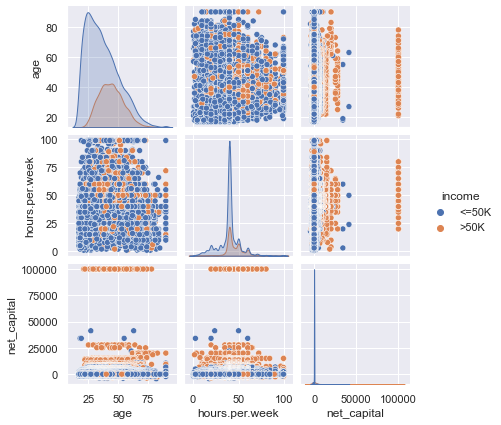

In [1232]:
# Patterns we see with our response variable
sns.pairplot(df, hue="income", height=2)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

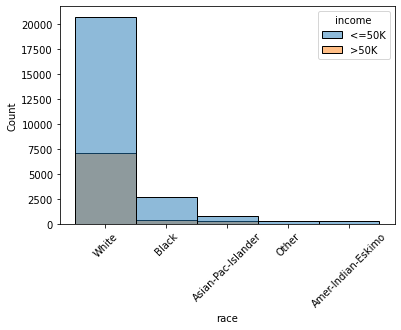

In [155]:
sns.histplot(data=df, x="race", hue="income")
plt.xticks(rotation=45)

In [33]:
import plotly.express

# Extra

In [1238]:
df.columns

Index(['age', 'workclass', 'marital.status', 'occupation', 'relationship',
       'race', 'sex', 'hours.per.week', 'income', 'net_capital', 'age_class',
       'work_type', 'net_capital_cat', 'edu_cat'],
      dtype='object')

<AxesSubplot:xlabel='hours.per.week', ylabel='Count'>

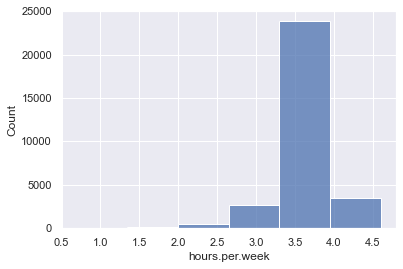

In [1239]:
sns.histplot(x="hours.per.week", data=df, bins=6)

<AxesSubplot:xlabel='age', ylabel='Count'>

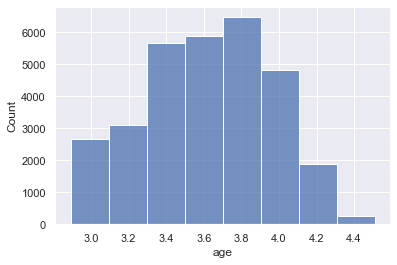

In [1240]:
sns.histplot(x="age", data=df, bins=8)

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Age and Income Anova

In [1246]:
df.columns=['age', 'workclass', 'marital.status', 'occupation', 'relationship',
       'race', 'sex', 'hours_per_week', 'income', 'net_capital', 'age_class',
       'work_type', 'net_capital_cat', 'edu_cat']


In [17]:
# Ordinary Least Squares (OLS) model
model = ols('age ~ C(income)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(income),3.318258e+05,1.0,1886.707314,0.0
Residual,5.726333e+06,32559.0,NaN,NaN


In [18]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df, res_var='age', xfac_var='income', anova_model='age ~ C(sex)')
res.tukey_summary

/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,<=50K,>50K,7.466103,7.120945,7.81126,59.959163,0.001


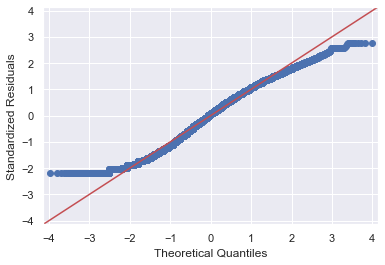

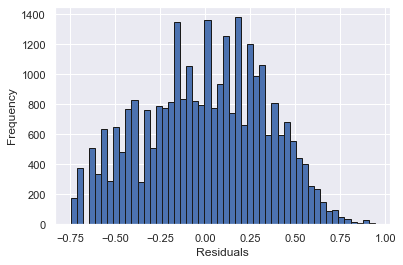

In [1250]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [1254]:
df.columns

Index(['age', 'workclass', 'marital.status', 'occupation', 'relationship',
       'race', 'sex', 'hours_per_week', 'income', 'net_capital', 'age_class',
       'work_type', 'net_capital_cat', 'edu_cat'],
      dtype='object')

In [1293]:
from scipy.stats import chi2_contingency

# chi.sq test to test if there is a statistical difference between income and sex
+ There is enough evidence to reject the null hypothesis of gender and income having no relationship(p_val=0.0)

In [1299]:
chisqt = pd.crosstab(df.sex, df.income, margins=True)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

#p val o 0.0, Statistical val 1441.4918478416585, df=2

(1441.4918478416585, 0.0, 2)


# chi.sq test to test if there is a statistical difference between income and race
+ There is also strong evidence to reject the null hypothesis of race and income having no relationship(p_val=2.266882172058718e-07)

In [1304]:
import scipy

In [1306]:
chisqt = pd.crosstab(df.race, df.income, margins=True)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])


(30.599380512111075, 2.266882172058718e-07, 2)


# Two way anova

<AxesSubplot:xlabel='sex', ylabel='hours_per_week'>

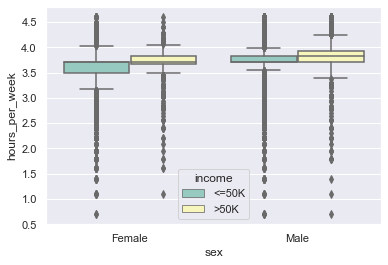

In [1255]:
sns.boxplot(x="sex", y="hours_per_week", hue="income", data=df, palette="Set3") 


In [1256]:
model = ols('hours_per_week ~ C(sex) + C(income) + C(sex):C(income)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(sex),115.75%,1.00%,989.86%,0.00%
C(income),110.03%,1.00%,940.97%,0.00%
C(sex):C(income),0.19%,1.00%,1.64%,0.20%
Residual,3591.50%,30714.00%,NaN,NaN


In [1257]:
from statsmodels.graphics.factorplots import interaction_plot

In [1264]:
df.columns

Index(['age', 'workclass', 'marital.status', 'occupation', 'relationship',
       'race', 'sex', 'hours_per_week', 'income', 'net_capital', 'age_class',
       'work_type', 'net_capital_cat', 'edu_cat'],
      dtype='object')

In [1266]:
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53%
1,A,1_year,1.83%
2,A,1_year,1.38%
3,B,1_year,3.60%
4,B,1_year,2.94%


In [1268]:
d_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genotype  54 non-null     object 
 1   years     54 non-null     object 
 2   value     54 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


In [1269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              30718 non-null  float64
 1   workclass        30718 non-null  object 
 2   marital.status   30718 non-null  object 
 3   occupation       30718 non-null  object 
 4   relationship     30718 non-null  object 
 5   race             30718 non-null  object 
 6   sex              30718 non-null  object 
 7   hours_per_week   30718 non-null  float64
 8   income           30718 non-null  object 
 9   net_capital      29257 non-null  float64
 10  age_class        30718 non-null  object 
 11  work_type        30718 non-null  object 
 12  net_capital_cat  30718 non-null  object 
 13  edu_cat          30718 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.5+ MB


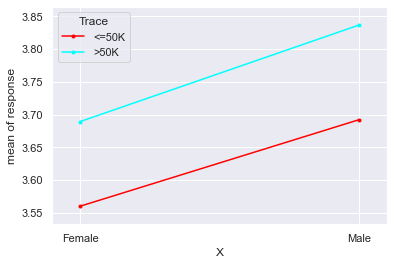

In [1292]:

# fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'], 
#     colors=['#4c061d','#d17a22', '#b4c292'])
# plt.show()

fig = interaction_plot(np.array(df['sex']), np.array(df['income']), np.array(df['hours_per_week'])
                      )
plt.show()

In [1279]:
df['income']

1        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 30718, dtype: object

In [ ]:
# more plotsss

<AxesSubplot:xlabel='sex', ylabel='age'>

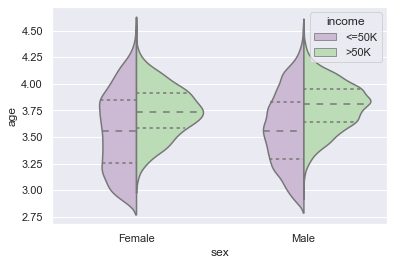

In [1085]:
sns.violinplot(x="sex", y="age", hue="income", data=df, 
               split=True, inner="quart",palette='PRGn',
               height=7)

<AxesSubplot:xlabel='age_class', ylabel='hours.per.week'>

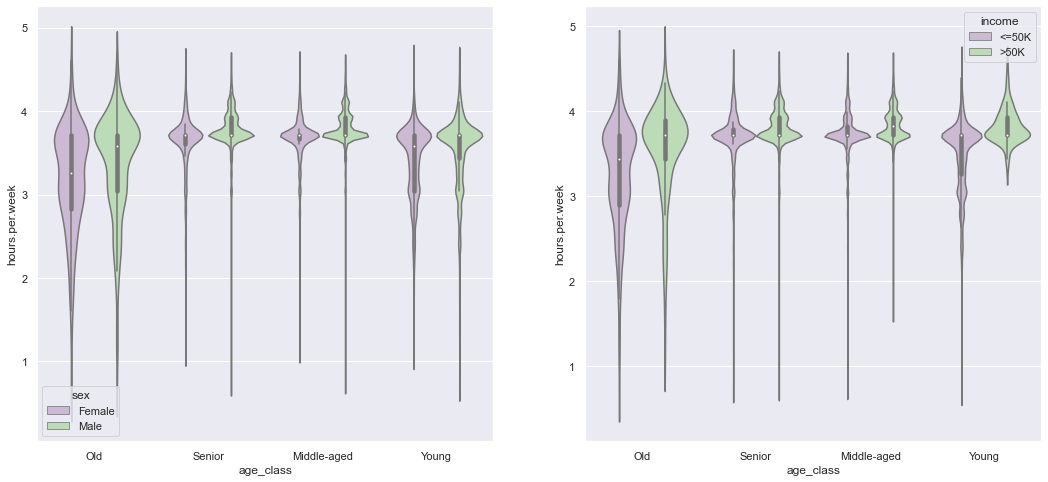

In [1086]:
sns.set()
fig, axes = plt.subplots(1, 2,figsize=(18, 8))

sns.violinplot(ax=axes[0], data=df,x='age_class',y='hours.per.week',hue='sex', 
               kind='violin',ci=95,palette='PRGn',
               height=7)

sns.violinplot(ax=axes[1],x='age_class',y='hours.per.week',hue='income',data=df, 
               kind='violin',ci=95,palette='PRGn',
               height=7)

<AxesSubplot:xlabel='relationship', ylabel='hours.per.week'>

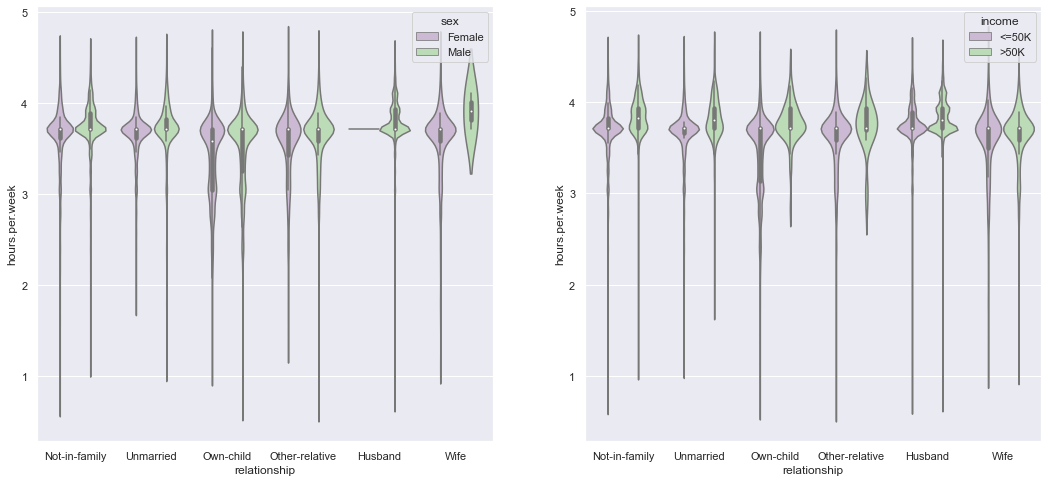

In [1087]:

sns.set()
fig, axes = plt.subplots(1, 2,figsize=(18, 8))

sns.violinplot(ax=axes[0], data=df,x='relationship',y='hours.per.week',hue='sex', 
               kind='violin',ci=95,palette='PRGn',
               height=7)

sns.violinplot(ax=axes[1],x='relationship',y='hours.per.week',hue='income',data=df, 
               kind='violin',ci=95,palette='PRGn',
               height=7)



In [1088]:
#### Verifying data type and updating to their correct dtype

# Making objects categorical varibles
for i in df.select_dtypes(include=['object']).columns:
    df[i]= df[i].astype("category")

from scipy import stats
from scipy.stats import zscore
#Let's standarize values first
for i in num_df.columns:
    df[i] = df[[i]].apply(zscore)

In [1089]:
# no strong relationships

<AxesSubplot:>

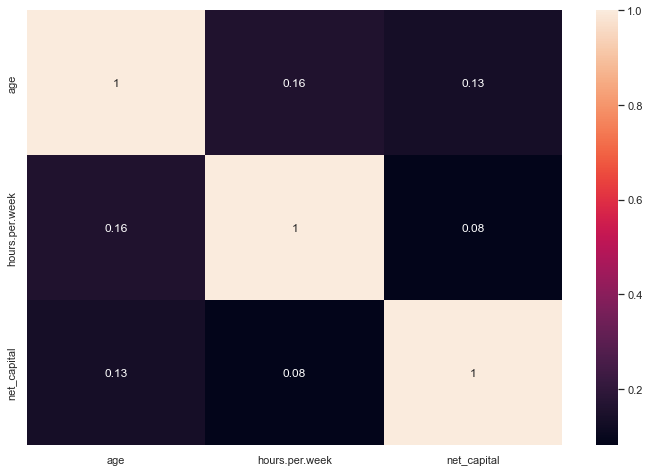

In [1090]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [152]:

income_cross=pd.crosstab(df["educationGroup"],df["income"], normalize=True)
# income_cross.plot(kind='bar', 
#                    stacked=True)

income_cross


income,<=50K,>50K
educationGroup,,
1SomeHS,0.123123,0.007494
2HSGrad,0.271060,0.051442
3SomeCol,0.181321,0.042597
4Assoc,0.055987,0.019225
5Bach,0.096250,0.068210
6Mast,0.023464,0.029452
7Proff,0.004699,0.012991
8Doct,0.003286,0.009398


In [147]:

income_cross=pd.crosstab(df["education"],df["income"], normalize=True)
income_cross.plot(kind='bar', 
                   stacked=True)

KeyError: 'education'

In [1092]:
df.skew() 

/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age              -0.14%
hours.per.week   -2.18%
net_capital       2.97%
dtype: float64